# MMDetection Tutorial

Welcome to MMDetection! This is the official colab tutorial for using MMDetection. In this tutorial, you will learn
- Perform inference with a MMDet detector.
- Train a new detector with a new dataset.

Let's start!


# Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

In [ ]:

'''
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

'''
!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version  #indicate mmcv install successfully
print(get_compiling_cuda_version())
print(get_compiler_version())

In [ ]:
pip install mmcv-full==latest+torch1.5.0+cu101 -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html

# Perform inference with a MMDet detector
MMDetection already provides high level APIs to do inference and training.

In [2]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/detectors/cascade_rcnn_r50_rfp_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/cascade_rcnn_r50_rfp_1x_coco-bbox-448.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

2020-12-08 23:52:26,420 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

missing keys in source state_dict: layer2.0.rfp_conv.weight, layer2.0.rfp_conv.bias, layer3.0.rfp_conv.weight, layer3.0.rfp_conv.bias, layer4.0.rfp_conv.weight, layer4.0.rfp_conv.bias



In [3]:
# Use the detector to do inference
img = 'testImages/test3.jpg'
result = inference_detector(model, img)

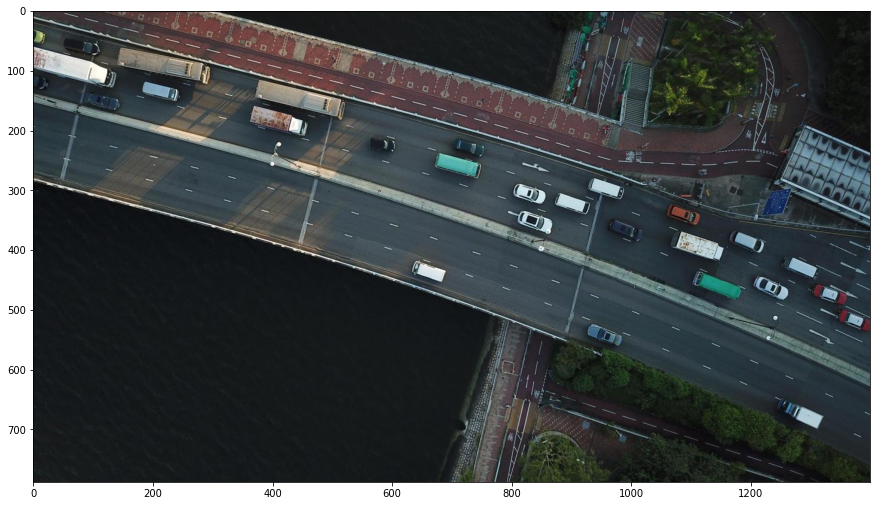

In [4]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

In [6]:
python tools/test.py configs/detectors/cascade_rcnn_r50_rfp_1x_coco.py checkpoints/cascade_rcnn_r50_rfp_1x_coco-bbox-448.pth  --out  out/aver.pkl --eval bbox --show

SyntaxError: invalid syntax (<ipython-input-6-5cf797304db4>, line 1)